In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dense, Activation, Dropout, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("../../data/contoh.csv", encoding = 'utf-8')
df = df.drop_duplicates()

df.sample(5)

,name,gender
140171,david riyanto,m
575490,tiruyeh,f
371395,muhammad hafizuddin azam,m
360854,muhammad azmi salim,m
176143,elove heartfilia,f


In [7]:
names = df['name'].apply(lambda x: x.lower())
gender = df['gender']

names

0               a'adila yasmin humairah
1                 a'aliyah ananda rusdi
2                                  a'am
3                         a'an darmawan
4             a'an dwi handika ramadhan
                      ...              
624236                  zysheila rizqia
624237                     zyva izabell
624238             zyva zhafira mandanu
624239    zyvanya dayang putri az-zahra
624240                zyvha eleora finn
Name: name, Length: 624174, dtype: object

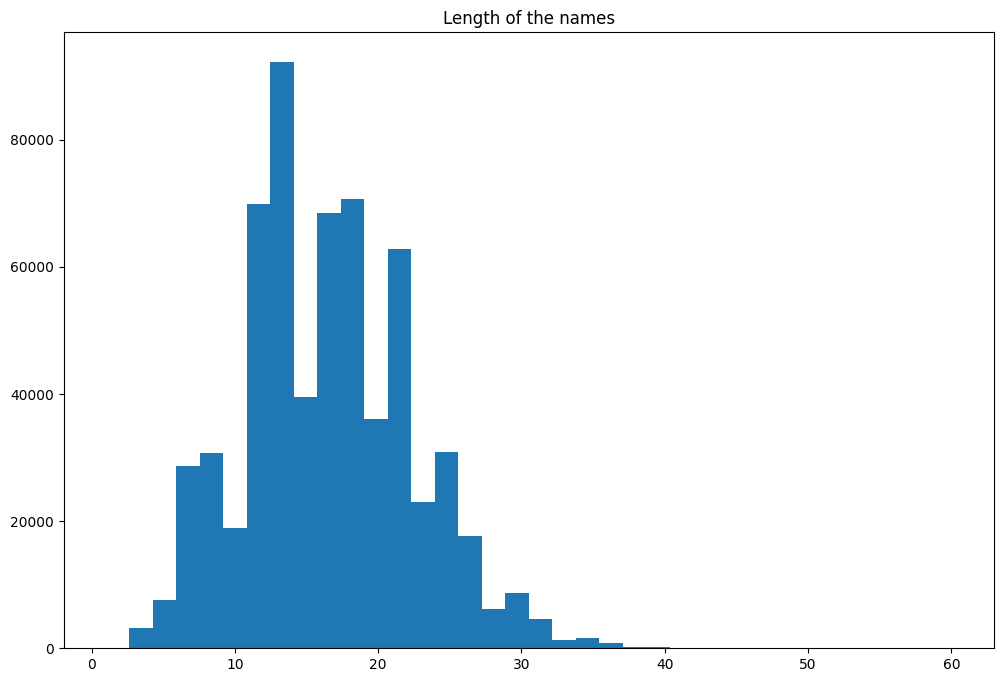

In [8]:
plt.figure(figsize=(12,8))
plt.hist([len(a) for a in names], bins=36)
plt.title("Length of the names")
plt.show()

In [9]:
maxlen = 40
labels = 2

In [11]:
print("Male : " + str(sum(gender=='m')))
print("Female : " + str(sum(gender=='f')))

Male : 322497
Female : 301677


In [17]:
vocab = set(' '.join([str(i) for i in names]))
vocab.add('END')
len_vocab = len(vocab)

In [ ]:
char_index = dict((c, i) for i, c in enumerate(vocab))
char_index

create the training dataset

In [20]:
X = []
y = []

# Builds an empty line with a 1 at the index of character
def set_flag(i):
    tmp = np.zeros(len_vocab);
    tmp[i] = 1
    return list(tmp)

# Truncate names and create the matrix
def prepare_X(X):
    new_list = []
    trunc_train_name = [str(i)[0:maxlen] for i in X]

    for i in trunc_train_name:
        tmp = [set_flag(char_index[j]) for j in str(i)]
        for k in range(0,maxlen - len(str(i))):
            tmp.append(set_flag(char_index["END"]))
        new_list.append(tmp)

    return new_list


X = prepare_X(names.values)

# Label Encoding of y
def prepare_y(y):
    new_list = []
    for i in y:
        if i == 'm':
            new_list.append([1,0])
        else:
            new_list.append([0,1])

    return new_list

y = prepare_y(gender)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Building the model

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(512, return_sequences=True), backward_layer=LSTM(512, return_sequences=True, go_backwards=True), input_shape=(maxlen,len_vocab)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(512)))
model.add(Dropout(0.2))
model.add(Dense(2, activity_regularizer=l2(0.002)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
plot_model(model, to_file='model_2.png', show_shapes=True, expand_nested=True)

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=5)
mc = ModelCheckpoint('best_model_9.h5', monitor='val_loss', mode='min', verbose=1)
reduce_lr_acc = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='max')

In [ ]:
batch_size = 256
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=35, verbose=1, validation_data =(X_test, y_test), callbacks=[callback, mc, reduce_lr_acc])

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Making predictions

In [ ]:
new_names = ["mael", "jenny", "marc"]
X_pred = prepare_X([rmv_acc(e) for e in new_names])

In [ ]:
prediction = model.predict(X_pred)
prediction

In [ ]:
def pred(new_names, prediction, dict_answer):
    return_results = []
    k = 0
    for i in prediction:
        if max(i) < 0.65:
            return_results.append([new_names[k], "N"])
        else:
            return_results.append([new_names[k], dict_answer[np.argmax(i)]])
        k += 1
    return return_results

In [ ]:
pred(new_names, prediction, dict_answer)